## Data Set-up

In [2]:
# 0
import numpy as np
import pandas as pd
avocados = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/avocado-updated-2020.csv")
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. 
The avocados dataset provides the average price, total volume, number of each sized bags sold in a region, number of each PLU code avocado, and type of avocados (organic or conventional) on a given date. It contains multiple years of information from cities across the United States starting in 2015 and ending in 2020. The data is sourced from the Haas Avocado Board website. 

In [3]:
# 2
avocados_clean = avocados.dropna(axis = 0, how = "any")
avocados_clean = avocados.rename(columns = {"4046": "medium", "4225": "large", "4770": "extra_large"})
avocados_clean

,date,average_price,total_volume,medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


## Exercises

In [4]:
# 3
avocados_geog = avocados_clean[avocados_clean["geography"].isin(
    ["California", "Great Lakes", "Midsouth", "New York", "Northeast", "Northern New England", "Plains", "South Central", "Southeast", "West"]
)]
# pd.unique(avocados_geog["geography"])

most_sold = avocados_geog[avocados_geog["type"] == "organic"]
most_sold = avocados_geog[avocados_geog["year"] == 2017]
most_sold = avocados_geog[["medium", "geography"]]
most_sold = most_sold.groupby("geography").sum()["medium"].idxmax()
most_sold

'South Central'

3. 
The major geographical region with the most medium (small), organic avocados sold in 2017 is the South Central region. 

In [5]:
# 4
avocados_clean[["month", "day"]] = avocados_clean["date"].str.split('-', expand=True)[[1, 2]]
# avocados_clean.head()
highest_month = avocados_clean[["month", "total_volume"]].groupby("month").mean().idxmax()
highest_month

total_volume    05
dtype: object

4.
The month with the highest average volume of avocado sales is May.

In [60]:
# 5
avocados_metro = avocados_clean[avocados_clean["geography"].isin(
    ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Nashville', 'New Orleans/Mobile',
       'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse',
       'Tampa']
)]
# pd.unique(avocados_metro["geography"])

In [61]:
highest_avg = avocados_metro[["geography", "total_volume"]].groupby("geography").mean()
highest_avg = highest_avg.sort_values("total_volume", ascending=False)[0:5]
highest_avg = highest_avg.reset_index()
highest_avg = highest_avg["geography"]
most_sold = avocados_clean[avocados_clean["geography"].isin(highest_avg)]
most_sold

,date,average_price,total_volume,medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
22,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,2015,Dallas/Ft. Worth,01,04
23,2015-01-04,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,2015,Dallas/Ft. Worth,01,04
24,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver,01,04
25,2015-01-04,1.42,22480.07,3199.35,6916.72,7.56,12356.44,1076.67,11279.77,0.00,organic,2015,Denver,01,04
36,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,115837.55,90299.85,25537.70,0.00,conventional,2015,Houston,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32974,2020-11-29,1.29,24312.04,3008.52,0.00,0.00,21303.52,11000.49,10303.03,0.00,organic,2020,Houston,11,29
32981,2020-11-29,1.06,2490232.13,848920.05,47467.30,77620.80,1516223.98,989779.93,420508.95,105935.10,conventional,2020,Los Angeles,11,29
32982,2020-11-29,1.74,135939.83,6283.66,1658.88,4.65,127992.64,63390.70,64601.94,0.00,organic,2020,Los Angeles,11,29
33003,2020-11-29,0.76,936684.60,309280.89,120280.85,3730.15,503392.71,222668.00,280622.22,102.49,conventional,2020,Phoenix/Tucson,11,29


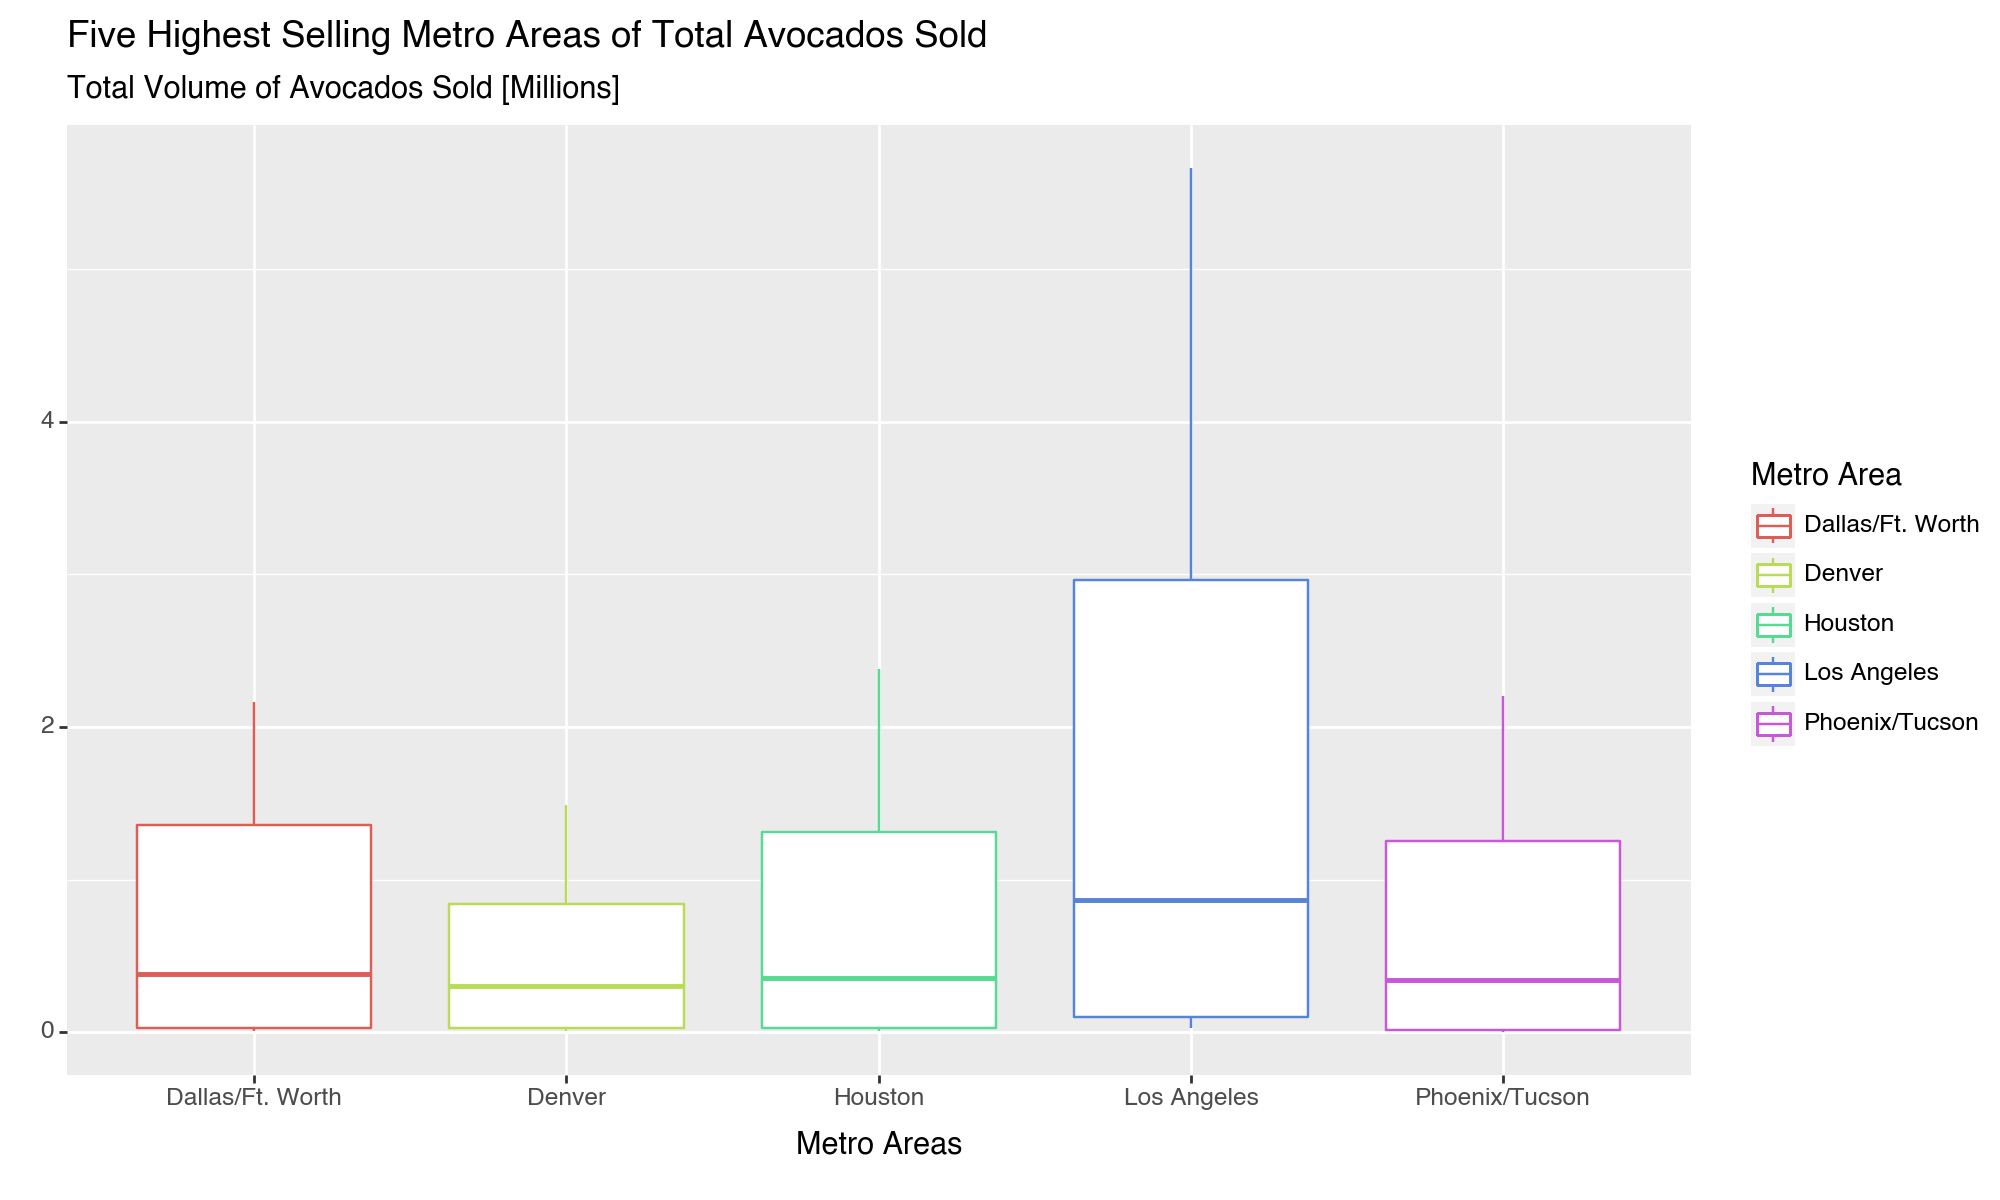

<Figure Size: (1000 x 600)>

In [62]:
from plotnine import ggplot, aes, geom_boxplot, labs, scale_y_continuous, theme
(ggplot(most_sold, aes(x = "geography", y = "total_volume", color = "geography")) + 
    geom_boxplot() + 
    scale_y_continuous(labels = ["0", "2", "4"]) +
    labs(
        x = "Metro Areas",
        y = "",
        subtitle = "Total Volume of Avocados Sold [Millions]",
        title = "Five Highest Selling Metro Areas of Total Avocados Sold",
        color = "Metro Area"
    ) + 
    theme(figure_size = (10, 6)))

5.
The 5 metro areas with the highest average total volumes of avocados sold are Dallas/Ft. Worth, Houston, Los Angeles, Phoenix/Tuscon, and Denver.

## Pivoting

In [66]:
# 6
cal_avocados = avocados_clean[avocados_clean["geography"].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]
cal_avocados.head()

,date,average_price,total_volume,medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,01,04
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,01,04
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,01,04
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,01,04
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,01,04


In [89]:
# 7
sum_stats = cal_avocados[["geography", "type", "average_price"]].groupby(["geography", "type"])
avg_diff = cal_avocados[["geography", "type", "average_price"]].groupby(["geography", "type"]).mean()
avg_diff = avg_diff.reset_index()
sum_stats.describe()

average_price                                    \
                                   count      mean       std   min     25%   
geography     type                                                           
Los Angeles   conventional         306.0  1.047124  0.231167  0.53  0.8925   
              organic              306.0  1.574902  0.311722  0.96  1.3425   
Sacramento    conventional         306.0  1.295359  0.219177  0.86  1.1325   
              organic              306.0  1.873856  0.292875  1.13  1.6700   
San Diego     conventional         306.0  1.113856  0.242960  0.61  0.9425   
              organic              306.0  1.798366  0.331655  1.05  1.5525   
San Francisco conventional         306.0  1.400490  0.272060  0.84  1.2200   
              organic              306.0  2.119444  0.395854  1.06  1.9025   

                                                 
                              50%     75%   max  
geography     type                               
Los Angeles   conventional  1.020  1.1475  1.80  
              organic       1.585  1.7475  2.44  
Sacramento    conventional  1.260  1.4300  1.89  
              organic       1.840  2.0475  2.82  
San Diego     conventional  1.090  1.2200  1.83  
              organic       1.800  1.9975  2.78  
San Francisco conventional  1.390  1.5675  2.20  
              organic       2.060  2.3600  3.25

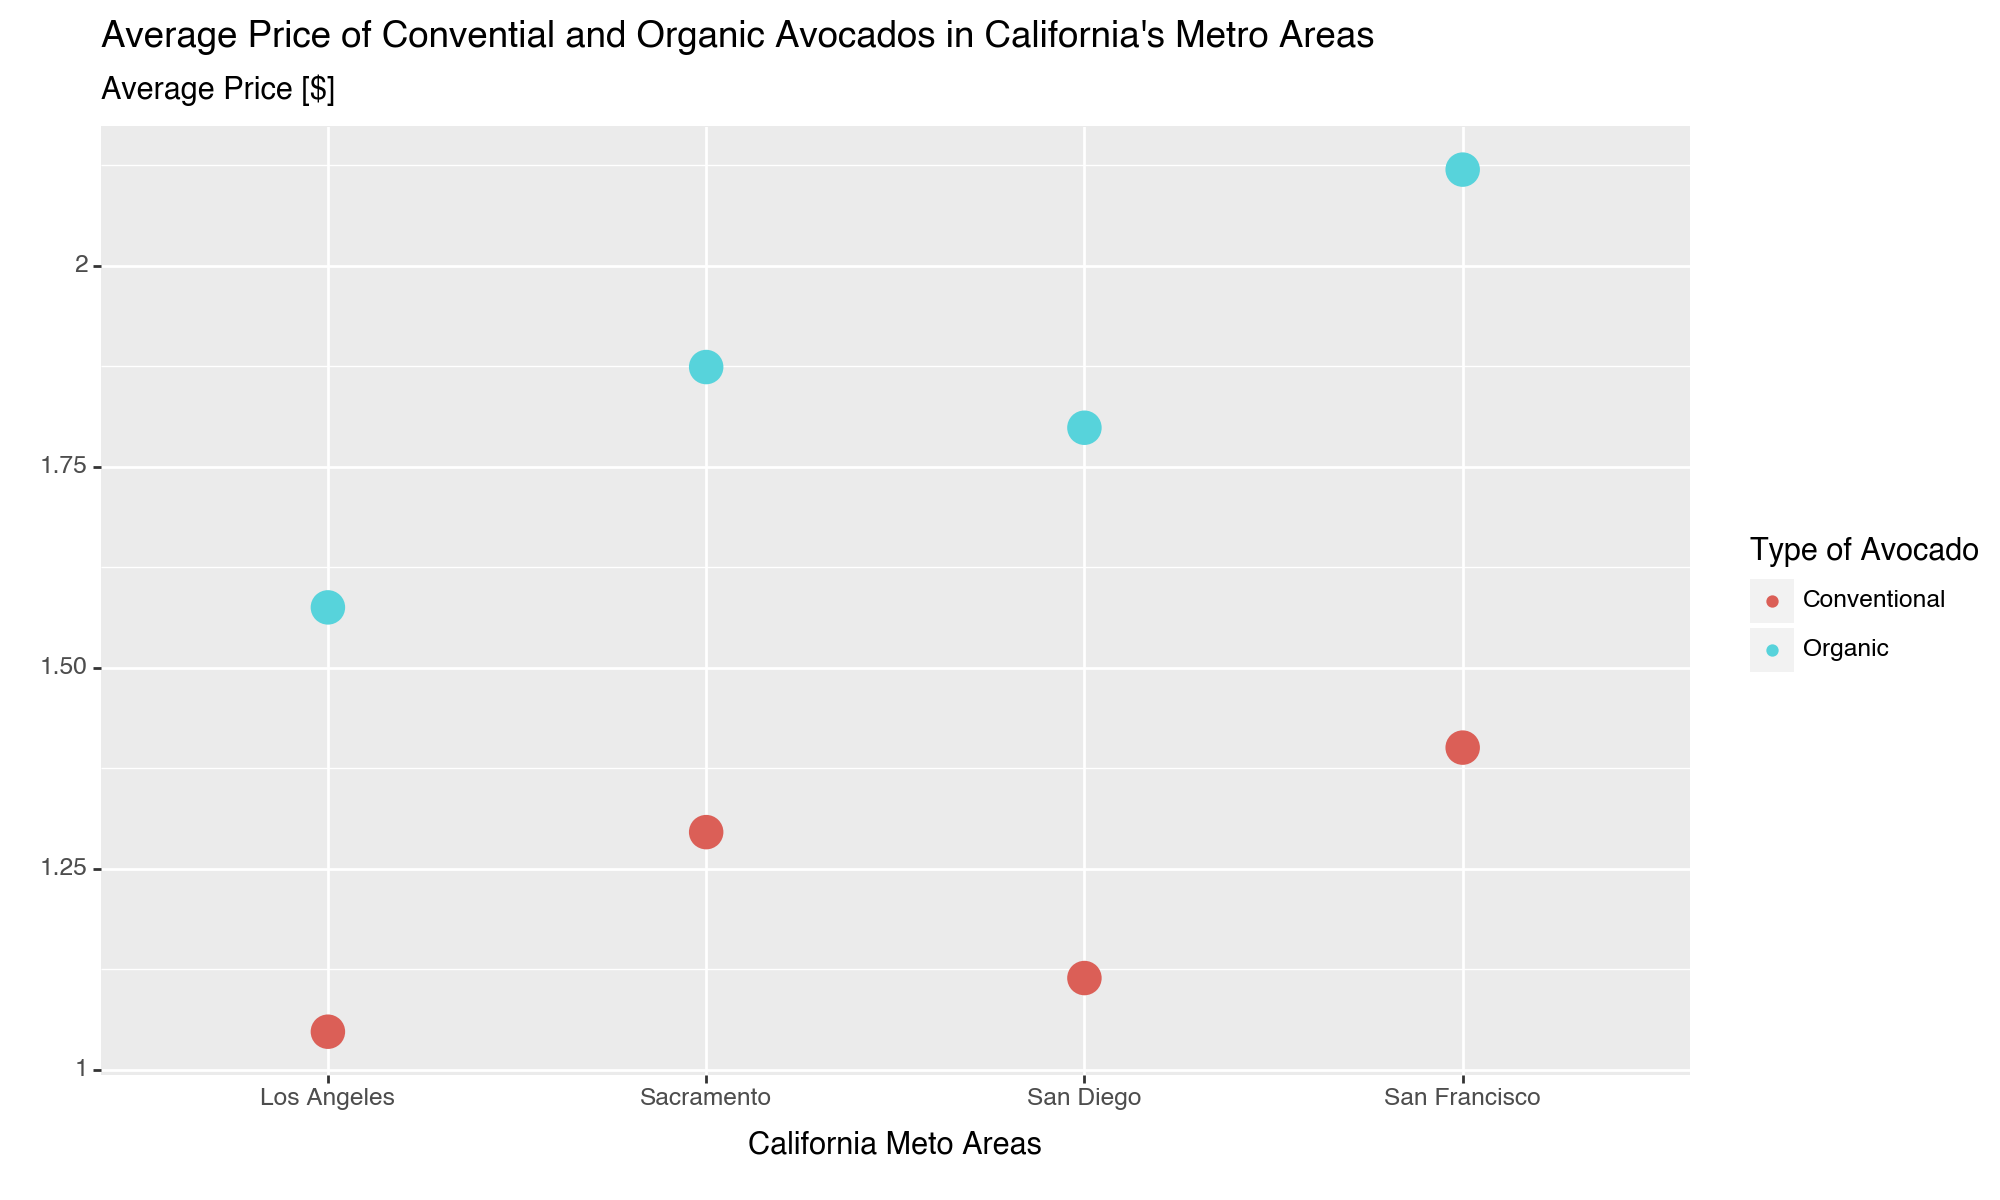

<Figure Size: (1000 x 600)>

In [95]:
# 7 Cont
from plotnine import geom_point, guides, scale_color_discrete
(ggplot(avg_diff, aes(x = "geography", y = "average_price", color = "type", size = 2)) + 
    geom_point() +
    labs(
        x = "California Meto Areas",
        y = "",
        subtitle = "Average Price [$]",
        title = "Average Price of Convential and Organic Avocados in California's Metro Areas",
        color = "Type of Avocado"
    ) +
    scale_color_discrete(labels = ["Conventional", "Organic"]) +
    theme(figure_size = (10, 6)) +
    guides(size = False))

In [153]:
# 8
msl_avo = cal_avocados[["geography", "total_volume", "medium", "large", "extra_large", "type"]].melt(
    id_vars = ["geography", "type", "total_volume"], var_name = "sizes", value_vars = ["medium", "large", "extra_large"], value_name = "avocados_sold"
)
msl_avo["total_sold"] = msl_avo.groupby(["geography", "type"])["avocados_sold"].transform("sum")
msl_avo["proportion_sold"] = msl_avo["avocados_sold"] / msl_avo["total_sold"]
msl_avo

,geography,type,total_volume,sizes,avocados_sold,total_sold,proportion_sold
0,Los Angeles,conventional,2682159.95,medium,1837999.65,5.244437e+08,0.003505
1,Los Angeles,organic,54495.54,medium,47721.51,1.078721e+07,0.004424
2,Sacramento,conventional,430138.88,medium,110693.69,1.195302e+08,0.000926
3,Sacramento,organic,9213.49,medium,3727.52,2.170262e+06,0.001718
4,San Diego,conventional,461607.33,medium,244152.26,9.848990e+07,0.002479
...,...,...,...,...,...,...,...
7339,Sacramento,organic,23531.38,extra_large,0.00,2.170262e+06,0.000000
7340,San Diego,conventional,469356.72,extra_large,7210.47,9.848990e+07,0.000073
7341,San Diego,organic,25799.95,extra_large,0.00,3.013542e+06,0.000000
7342,San Francisco,conventional,644141.37,extra_large,5597.21,2.081255e+08,0.000027


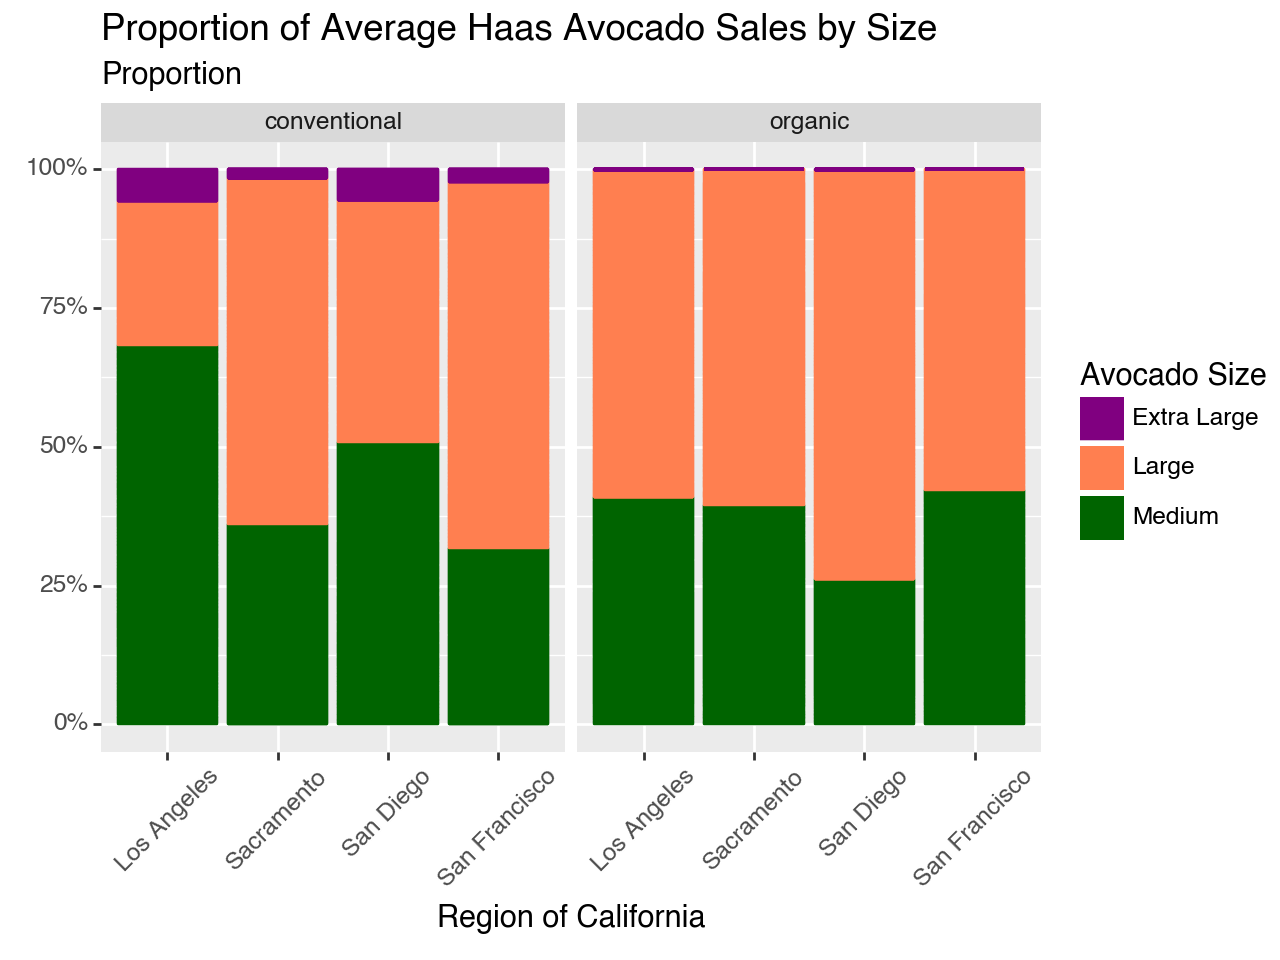

<Figure Size: (640 x 480)>

In [166]:
# 8 Cont
from plotnine import facet_grid, geom_col, scale_color_manual, scale_y_continuous, element_text
(ggplot(msl_avo, aes(x = "geography", y = "proportion_sold", color = "sizes", fill = "sizes")) +
  facet_grid(".~type") +
  geom_col() +
  scale_color_manual(
    values = ["purple", "coral", "darkgreen"],
    labels = ["Extra Large", "Large", "Medium"],
    aesthetics = ["color", "fill"]
    ) +
  theme(axis_text_x = element_text(angle=45)) +
  scale_y_continuous(labels = ["0%", "25%", "50%", "75%", "100%"]) +
  labs(x = "Region of California", y = "", subtitle = "Proportion", title = "Proportion of Average Haas Avocado Sales by Size",
       fill = "Avocado Size", color = "Avocado Size"))

## Using Outside Data
I found four housing price datasets from https://fred.stlouisfed.org/, one for each California region.

In [176]:
# Data Import
sacramento = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/SacramentoHousingPrices.csv", nrows=24, skiprows=155, names=["date", "price"])
san_francisco = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/SanFranciscoHousingPrices.csv", nrows=24, skiprows=158, names=["date", "price"])
san_diego = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/SanDiegoHousingPrices.csv", nrows=24, skiprows=157, names=["date", "price"])
los_angeles = pd.read_csv("/Users/ben/Documents/GitHub/DSML/Data/LosAngelesHousingPrices.csv", nrows=72, skiprows=336, names=["date", "price"])
sacramento["city"] = "Sacramento"
san_francisco["city"] = "San Francisco"
san_diego["city"] = "San Diego"
los_angeles["city"] = "Los Angeles"
california_housing_prices = sacramento.merge(san_francisco, on=["date", "city", "price"], how="outer")
california_housing_prices = california_housing_prices.merge(san_diego,  on=["date", "city", "price"], how="outer")
california_housing_prices = california_housing_prices.merge(los_angeles,  on=["date", "city", "price"], how="outer")
california_housing_prices[["year", "month", "day"]] = california_housing_prices["date"].str.split("-", expand=True)
california_housing_prices

,date,price,city,year,month,day
0,2014-10-01,210.240000,Sacramento,2014,10,01
1,2015-01-01,212.190000,Sacramento,2015,01,01
2,2015-04-01,217.340000,Sacramento,2015,04,01
3,2015-07-01,222.690000,Sacramento,2015,07,01
4,2015-10-01,225.110000,Sacramento,2015,10,01
...,...,...,...,...,...,...
139,2020-07-01,299.400338,Los Angeles,2020,07,01
140,2020-08-01,304.799897,Los Angeles,2020,08,01
141,2020-09-01,309.238633,Los Angeles,2020,09,01
142,2020-10-01,313.291107,Los Angeles,2020,10,01


In [261]:
pd.options.mode.chained_assignment = None
cal_avocados.loc[:, "year"] = cal_avocados["year"].astype(int)
california_housing_prices["year"] = california_housing_prices["year"].astype(int)
cal_avocados["geography"] = cal_avocados["geography"].astype(str)
california_housing_prices["city"] = california_housing_prices["city"].astype(str)

cal_avo = california_housing_prices.merge(cal_avocados, how="inner",
                                          left_on=["city", "year", "month"],
                                          right_on=["geography", "year", "month"])
cal_avo = cal_avo.drop(columns=["date_x", "day_x", "date_y", "day_y"])
cal_avo

,price,city,year,month,average_price,total_volume,medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,geography
0,212.19000,Sacramento,2015,01,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,Sacramento
1,212.19000,Sacramento,2015,01,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,Sacramento
2,212.19000,Sacramento,2015,01,1.09,429492.28,109368.41,271300.08,5094.23,43729.56,43722.89,6.67,0.00,conventional,Sacramento
3,212.19000,Sacramento,2015,01,1.27,7598.26,4243.14,3033.84,0.00,321.28,321.28,0.00,0.00,organic,Sacramento
4,212.19000,Sacramento,2015,01,1.22,367047.36,83097.77,238956.51,5672.46,39320.62,39320.62,0.00,0.00,conventional,Sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,317.05199,Los Angeles,2020,11,1.71,144475.57,6980.73,1794.69,0.00,135700.15,67811.74,67888.41,0.00,organic,Los Angeles
1220,317.05199,Los Angeles,2020,11,0.95,3236266.23,1257647.15,60888.44,71270.75,1846459.89,1139228.95,510639.96,196590.98,conventional,Los Angeles
1221,317.05199,Los Angeles,2020,11,1.64,153269.10,6522.42,1563.69,5.90,145177.09,72027.44,73149.65,0.00,organic,Los Angeles
1222,317.05199,Los Angeles,2020,11,1.06,2490232.13,848920.05,47467.30,77620.80,1516223.98,989779.93,420508.95,105935.10,conventional,Los Angeles


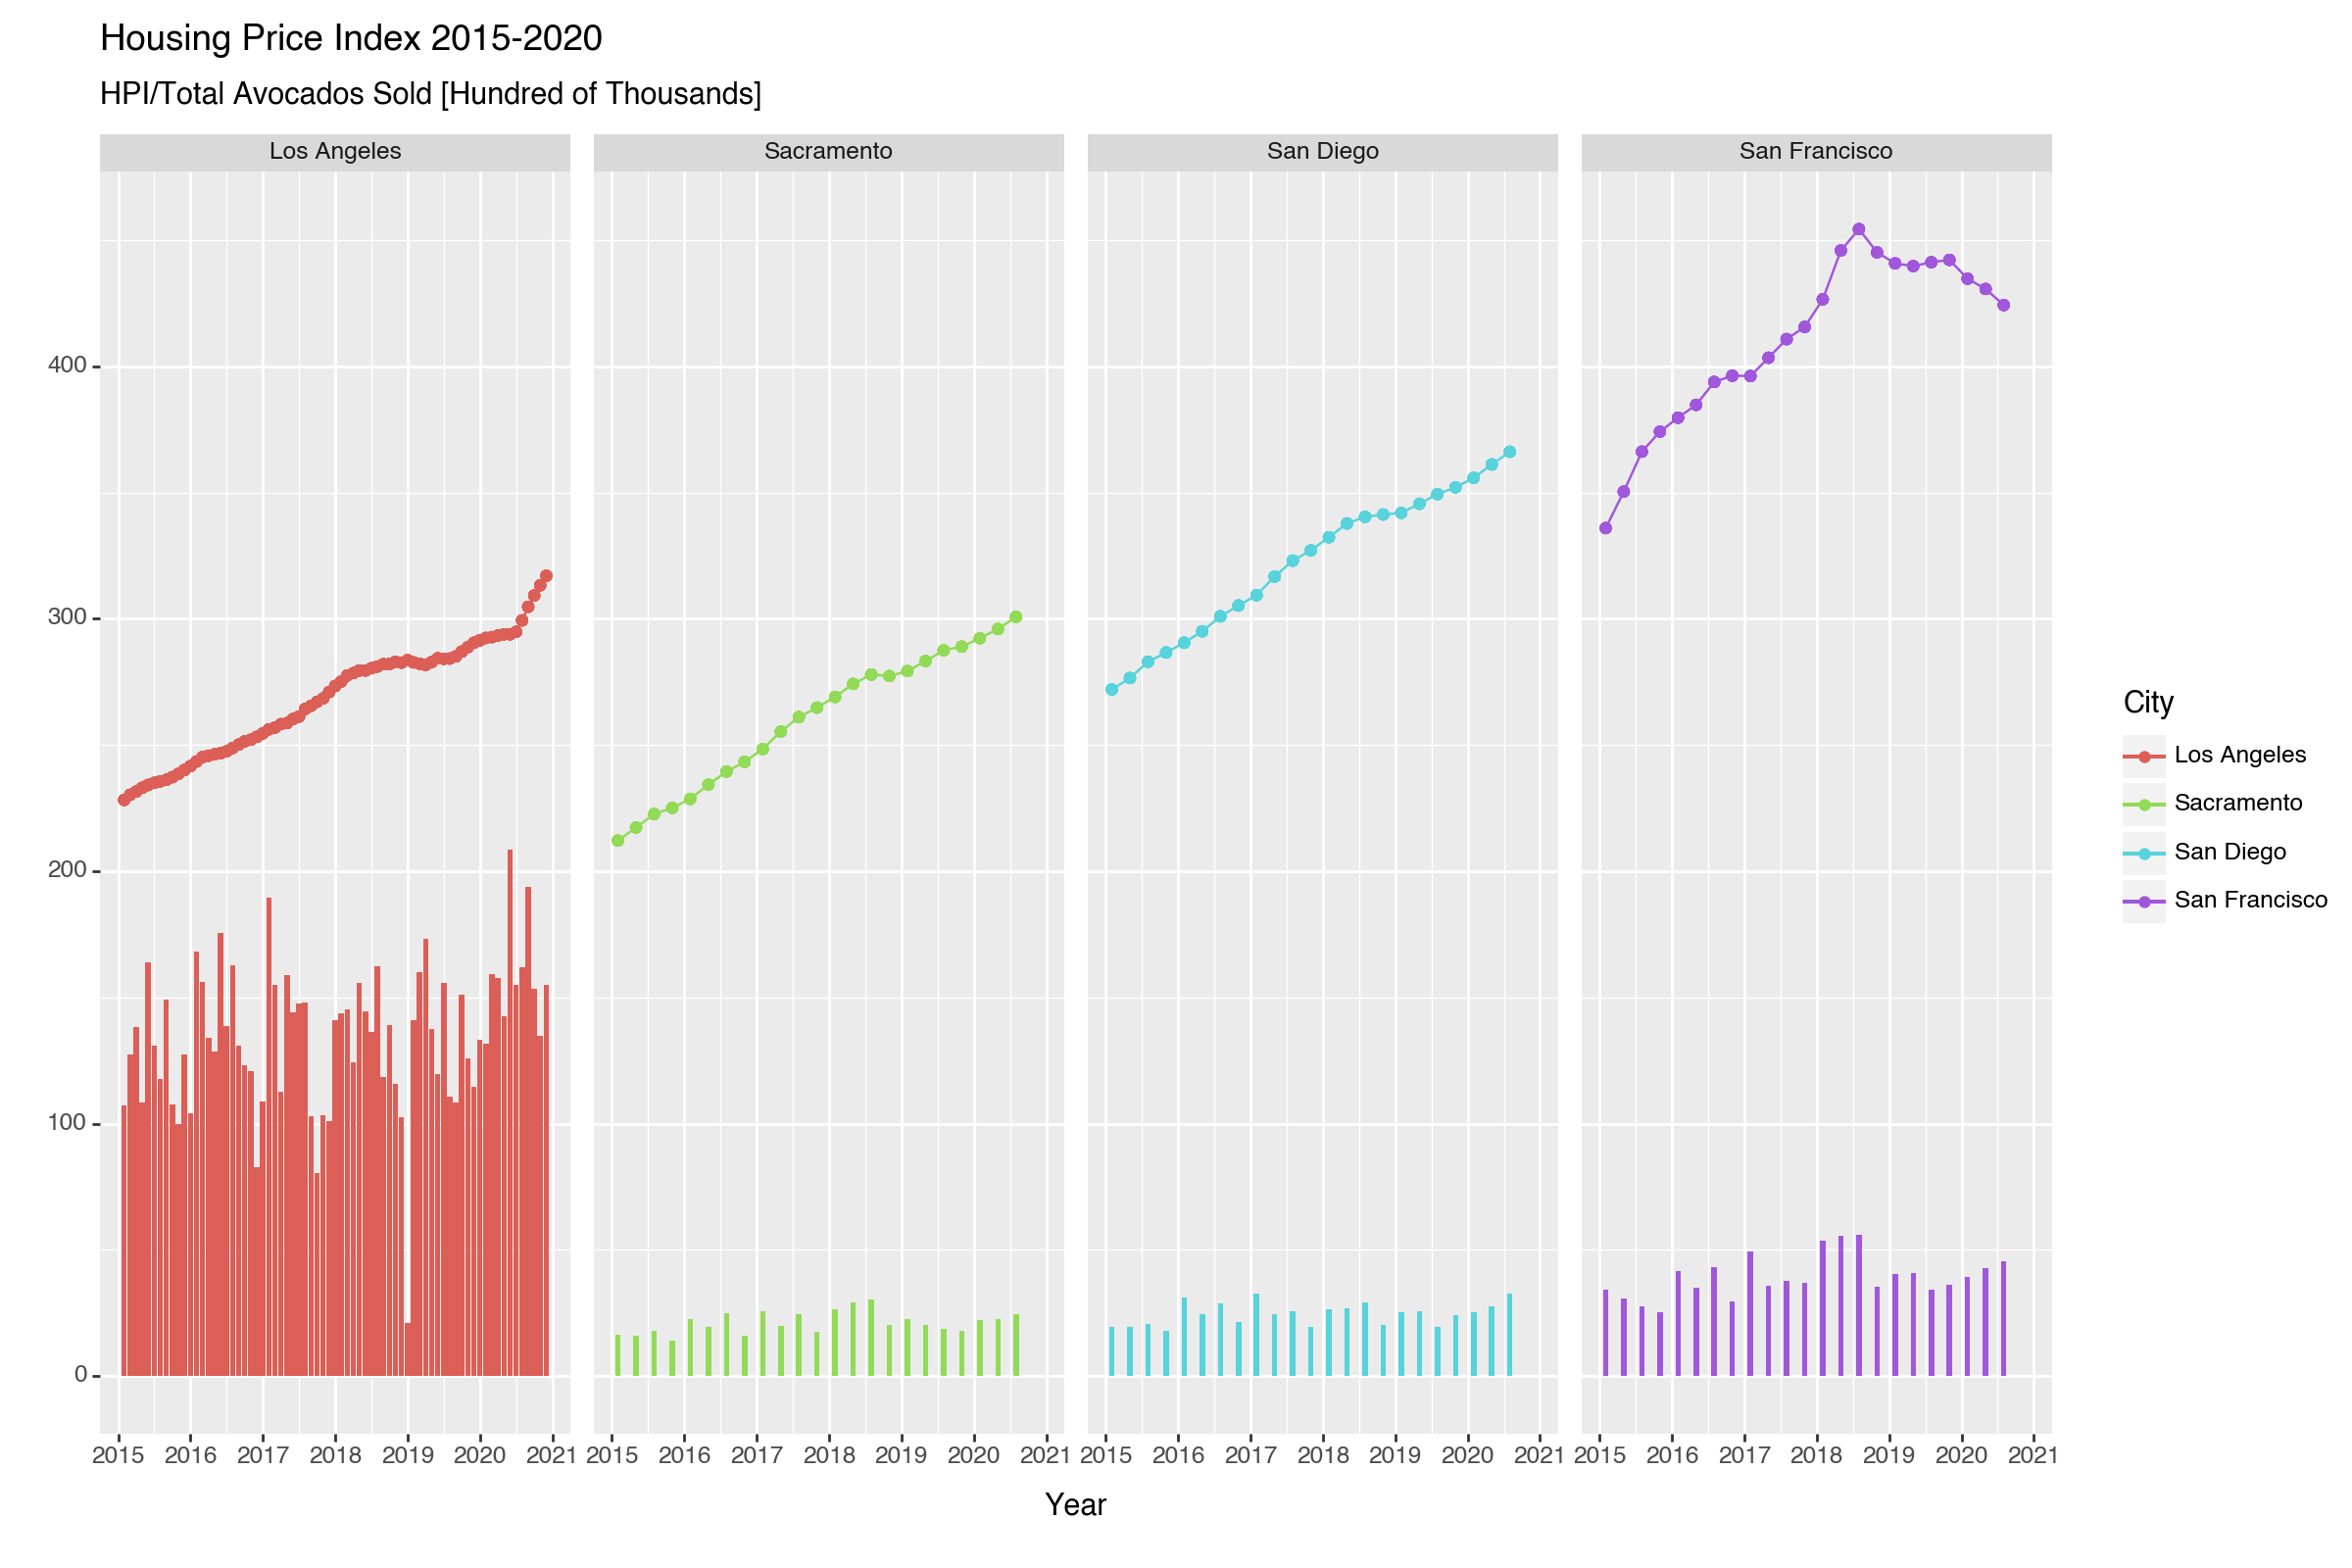

<Figure Size: (1200 x 800)>

In [287]:
from plotnine import geom_path, geom_bar
cal_avo["month"] = cal_avo["month"].astype(int)
cal_avo["pdate"] = cal_avo["year"] + cal_avo["month"] / 12
cal_avo["total_volume_scaled"] = cal_avo["total_volume"] / 100000
(ggplot(cal_avo, aes(x = "pdate", y = "price", color = "city")) +
  geom_point() +
  geom_path() + 
  geom_bar(aes(x = "pdate", y = "total_volume_scaled", fill = "city"), inherit_aes = False, stat = "identity") +
  facet_grid(".~city") +
  labs(
      x = "Year",
      y = "",
      subtitle = "HPI/Total Avocados Sold [Hundred of Thousands]",
      title = "Housing Price Index 2015-2020",
      color = "City") +
  theme(figure_size = (12, 8)) +
  guides(fill = False))

The data shows that there is no relationship between housing prices and avocado purchases. When looking at the housing price index and the average volume of avocados bought in the four cities, it becomes clear that there is not trend. Sacramento and Los Angeles have similar home prices, but drastically different amounts of avocado sales. This large discrepancy may just be an outlier, but as Los Angeles is the largest of the four metro areas, it is unlikely that avocado sales are associated with housing prices. It can also be seen that while HPI has been increasing, avocado sales have stayed fairly constant, which further suggests that there is no relationship between house prices and avocado sales.